# **Import Libraries**

In [2437]:
import pandas as pd
import numpy as np

import plotly.express as xp
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

import pickle

# **Load Data**

In [2438]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Understanding Data**

In [2439]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2440]:
df.shape

(7043, 21)

In [2441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2442]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [2443]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# **Data Preprocessing**

## Duplicate Values

In [2444]:
df.duplicated().sum()

0

In [2445]:
df[df.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Handling Missing Value

In [2446]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2447]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

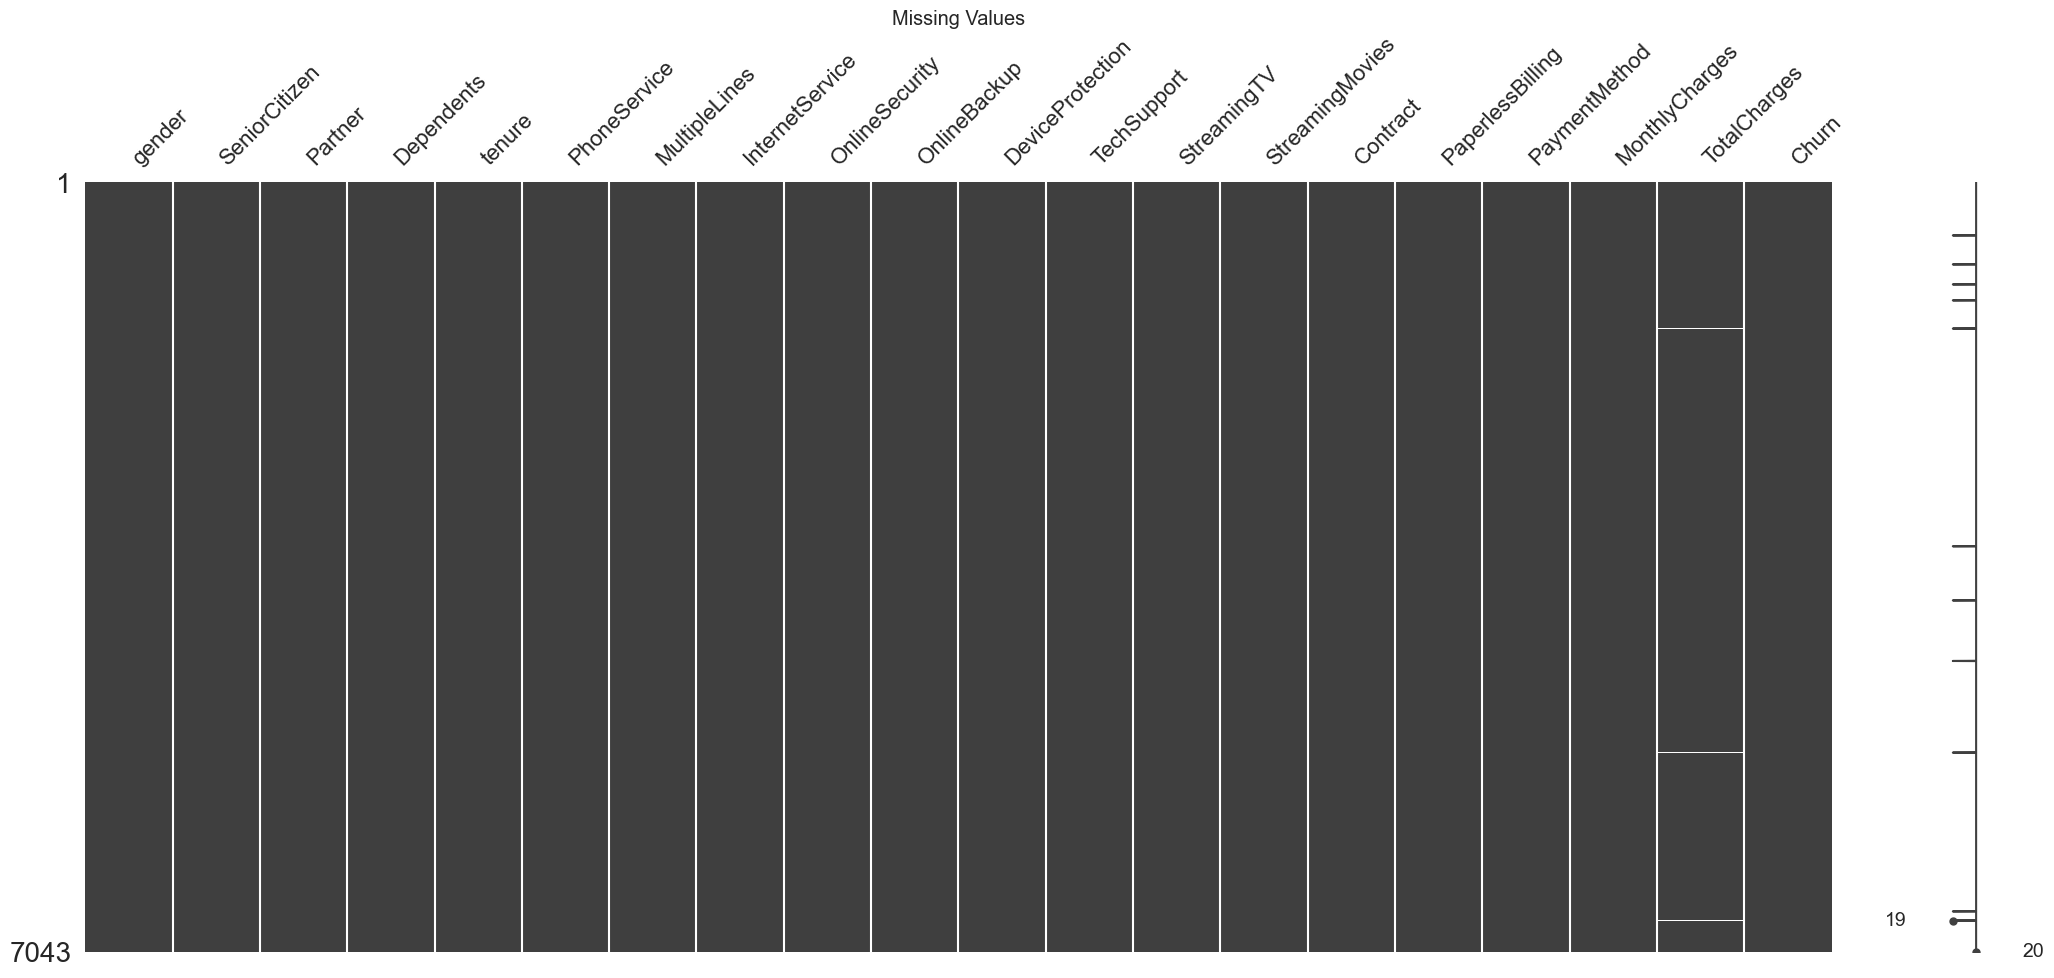

In [2448]:
msno.matrix(df)
plt.title("Missing Values")
plt.show()

In [2449]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [2450]:
df.dropna(inplace=True)

In [2451]:
df.shape

(7032, 20)

## Handling Outliers

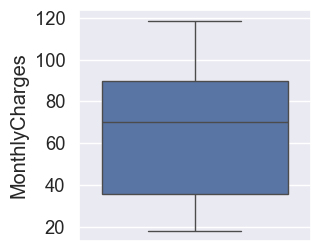

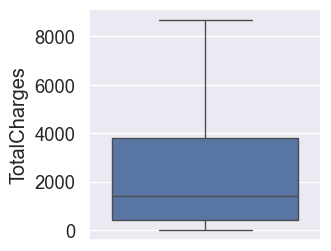

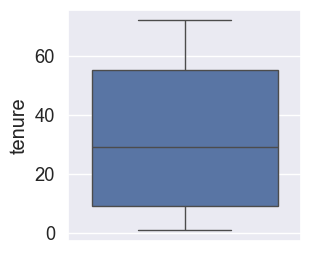

In [2452]:
features = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Visualize potential outliers using boxplots
for feat in features:
    plt.figure(figsize=(3, 3))
    sns.boxplot(data=df[feat])
    plt.show()


## Data Manipulation

In [2453]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2454]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [2455]:
df.describe(include=[object])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


## Data separation as X and y

In [2456]:
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
y
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [2457]:
X = df.drop('Churn', axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


## Data Splitting

In [2458]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [2459]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,No,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,No,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,No,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,No,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,No,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,Male,Yes,Yes,No,65,Yes,No,Fiber optic,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),70.95,4555.20
5123,Female,Yes,No,No,15,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1147.45
4135,Female,No,Yes,Yes,36,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.90,3379.25
4249,Female,No,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [2460]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
974,Female,No,Yes,Yes,59,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),75.95,4542.35
619,Female,No,No,No,7,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),78.55,522.95
4289,Female,No,No,No,54,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,1079.45
3721,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,38.70
4533,Female,No,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.15,7555.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Female,No,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
5176,Female,No,No,Yes,26,No,No phone service,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Mailed check,45.80,1147.00
2750,Male,No,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,69.25
4432,Male,No,No,No,37,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Mailed check,40.55,1390.85


## Validate Categorical Data

In [2461]:
def validate_test_data_categorical_columns(train_df, test_df):
    # Get the list of categorical columns for both train and test DataFrames
    train_df_categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
    test_df_categorical_columns = test_df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Check if the number of categorical columns is the same in both DataFrames
    if len(set(train_df_categorical_columns).intersection(set(test_df_categorical_columns))) == 0:
        print('Train and test dataframes have different categorical columns')
        return
    else:
        for cat_col in test_df_categorical_columns:
            # Create sets of unique values for the current categorical column in both DataFrames
            train_col = set(x for x in train_df[cat_col].unique().tolist() if not pd.isna(x))
            test_col = set(x for x in test_df[cat_col].unique().tolist() if not pd.isna(x))

            # Check if the sets are not equal, indicating different unique values
            if train_col != test_col:
                print(f'{cat_col} column has different unique values in train and test data:')
                print(f'Unique values in train data: {train_col}')
                print(f'Unique values in test data: {test_col}')
                return

        print('All categorical columns have consistent unique values in train and test data.')
        return

validate_test_data_categorical_columns(X_train, X_test)

All categorical columns have consistent unique values in train and test data.


## Encoding Categorical Data

In [2462]:
label_encoder = LabelEncoder()

categorical_columns = [
    'gender', 
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling' , 
    'Contract', 
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies',
    'PaymentMethod'
]

label_encoders = {}

for column in categorical_columns:
    # Fit and transform the column
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    # Save the encoder
    label_encoders[column] = le

print("Encoded DataFrame:")
df.head()

Encoded DataFrame:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [2463]:
print("Label Encoding Mapping:")
for column, le in label_encoders.items():
    print(f"\nColumn: {column}")
    for i, label in enumerate(le.classes_):
        print(f"{i}: {label}")

Label Encoding Mapping:

Column: gender
0: Female
1: Male

Column: SeniorCitizen
0: No
1: Yes

Column: Partner
0: No
1: Yes

Column: Dependents
0: No
1: Yes

Column: PhoneService
0: No
1: Yes

Column: PaperlessBilling
0: No
1: Yes

Column: Contract
0: Month-to-month
1: One year
2: Two year

Column: MultipleLines
0: No
1: No phone service
2: Yes

Column: InternetService
0: DSL
1: Fiber optic
2: No

Column: OnlineSecurity
0: No
1: No internet service
2: Yes

Column: OnlineBackup
0: No
1: No internet service
2: Yes

Column: DeviceProtection
0: No
1: No internet service
2: Yes

Column: TechSupport
0: No
1: No internet service
2: Yes

Column: StreamingTV
0: No
1: No internet service
2: Yes

Column: StreamingMovies
0: No
1: No internet service
2: Yes

Column: PaymentMethod
0: Bank transfer (automatic)
1: Credit card (automatic)
2: Electronic check
3: Mailed check


In [2464]:
for column in categorical_columns:
  le.fit(X_train[column])
  X_train[column] = le.transform(X_train[column])

for column in categorical_columns:
  le.fit(X_test[column])
  X_test[column] = le.transform(X_test[column])

In [2465]:
label_encoders = {
    'gender': LabelEncoder().fit(['Female', 'Male']),
    'Partner': LabelEncoder().fit(['No', 'Yes']),
    'SeniorCitizen': LabelEncoder().fit(['No', 'Yes']),
    'Dependents': LabelEncoder().fit(['No', 'Yes']),
    'PhoneService': LabelEncoder().fit(['No', 'Yes']),
    'PaperlessBilling': LabelEncoder().fit(['No', 'Yes']),
    'Contract': LabelEncoder().fit(['Month-to-month', 'One year', 'Two year']),
    'MultipleLines': LabelEncoder().fit(['No', 'No phone service', 'Yes']),
    'InternetService': LabelEncoder().fit(['DSL', 'Fiber optic', 'No']),
    'OnlineSecurity': LabelEncoder().fit(['No', 'No internet service', 'Yes']),
    'OnlineBackup': LabelEncoder().fit(['No', 'No internet service', 'Yes']),
    'DeviceProtection': LabelEncoder().fit(['No', 'No internet service', 'Yes']),
    'TechSupport': LabelEncoder().fit(['No', 'No internet service', 'Yes']),
    'StreamingTV': LabelEncoder().fit(['No', 'No internet service', 'Yes']),
    'StreamingMovies': LabelEncoder().fit(['No', 'No internet service', 'Yes']),
    'PaymentMethod': LabelEncoder().fit(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'])
}

# Saving the encoder to a file
with open('encoder.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

## Standardise Data

In [2466]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    plt.grid()
    ax = sns.distplot(frame[feature], color= color)

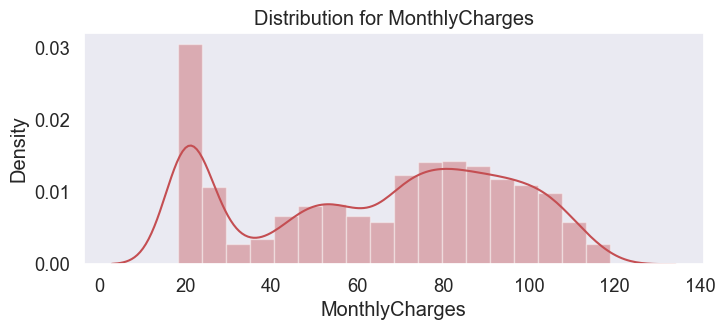

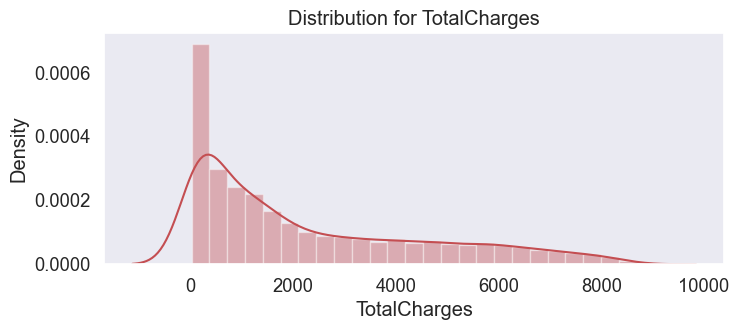

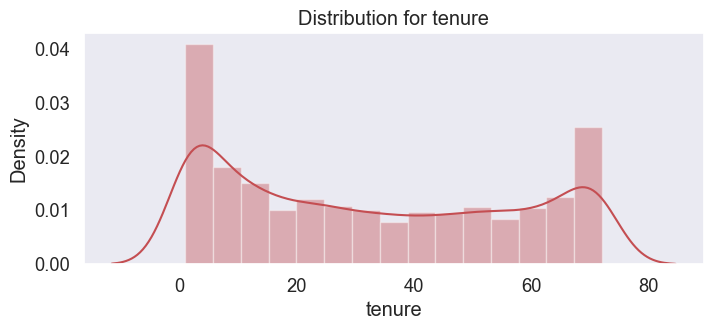

In [2467]:
features = ['MonthlyCharges', 'TotalCharges', 'tenure']

for feat in features:
    distplot(feat, df)

In [2468]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[features].astype('float64')), columns=features)
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

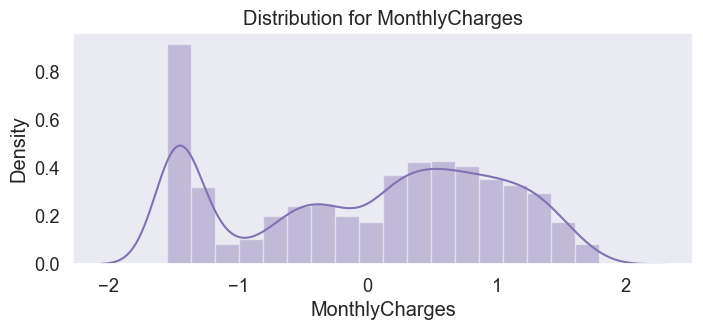

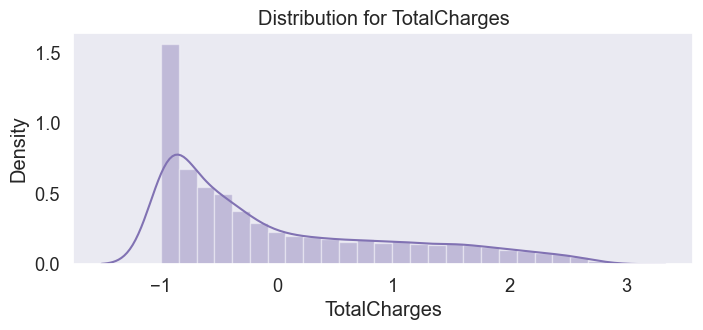

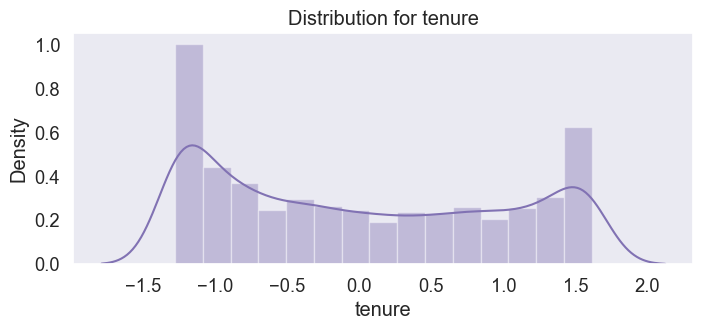

In [2469]:
for feat in features:
    distplot(feat, df_std, color='m')

# Exploratory Data Analysis

## Data Summary

In [2470]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [2471]:
# Data Summary
print("---- Data Summary ----")

# Partner and Senior Citizen summary
print("\nCount of people with or without partners:")
print(df['Partner'].value_counts())
print('-----------------------------------------------------------')

print("\nCount of people with or without partners by gender:")
print(df.groupby('gender')['Partner'].value_counts())
print('-----------------------------------------------------------')

# Dependents summary
print("\nCount of people with and without dependents:")
print(df['Dependents'].value_counts())
print('-----------------------------------------------------------')

print("\nCount of dependents by Senior Citizen status:")
print(df.groupby('SeniorCitizen')['Dependents'].value_counts())
print('-----------------------------------------------------------')

print("\nCount of dependents by Gender:")
print(df.groupby('gender')['Dependents'].value_counts())
print('-----------------------------------------------------------')

# Tenure summary
print("\nTenure summary:")
print(f"Minimum Tenure: {df['tenure'].min()} months")
print(f"Maximum Tenure: {df['tenure'].max()} months")
print(f"Average Tenure: {df['tenure'].mean():.1f} months")
print(f"Most Common Tenure: {df['tenure'].mode()[0]} months")
print('-----------------------------------------------------------')

# PhoneService summary
print("\nPhoneService subscription counts:")
print(df['PhoneService'].value_counts())
print('-----------------------------------------------------------')

print("\nPhoneService by Senior Citizen status:")
print(df.groupby('PhoneService')['SeniorCitizen'].value_counts())
print('-----------------------------------------------------------')

# MultipleLines summary
print("\nMultiple Lines subscription counts:")
print(df['MultipleLines'].value_counts())
print('-----------------------------------------------------------')

# InternetService counts
print("\nInternet Service counts:")
print(df['InternetService'].value_counts())
print('-----------------------------------------------------------')

# Group by gender and InternetService
print("\nInternet Service distribution by gender:")
print(df.groupby('gender')['InternetService'].value_counts())
print('-----------------------------------------------------------')

# Group by Senior Citizen
print("\nInternet Service distribution by Senior Citizen status:")
print(df.groupby('SeniorCitizen')['InternetService'].value_counts())
print('-----------------------------------------------------------')

# Streaming Services summary
print("\nStreamingTV distribution by Dependents:")
print(df.groupby('Dependents')['StreamingTV'].value_counts())
print('-----------------------------------------------------------')

print("\nStreamingMovies distribution:")
print(df['StreamingMovies'].value_counts())
print('-----------------------------------------------------------')

# Contract summary
print("\nContract distribution:")
print(df['Contract'].value_counts())
print('-----------------------------------------------------------')

# Paperless Billing summary
print("\nPaperless Billing distribution:")
print(df['PaperlessBilling'].value_counts())

total_paperless = df['PaperlessBilling'].value_counts().sum()
paperless_counts = df['PaperlessBilling'].value_counts()
paperless_use_percentage = paperless_counts[0] / total_paperless
paperless_no_use_percentage = paperless_counts[1] / total_paperless

print(f"{paperless_use_percentage:.2f} % use Paper Billing while {paperless_no_use_percentage:.2f}% do not use Paper Billing")
print('-----------------------------------------------------------')

print("\nPaperless Billing distribution by Gender:")
print(df.groupby('gender')['PaperlessBilling'].value_counts())
print('-----------------------------------------------------------')

print("\nPaperless Billing distribution by Senior Citizen status:")
print(df.groupby('SeniorCitizen')['PaperlessBilling'].value_counts())
print('-----------------------------------------------------------')

print("\nPaperless Billing distribution by Dependents:")
print(df.groupby('Dependents')['PaperlessBilling'].value_counts())
print('-----------------------------------------------------------')

print("\nPaperless Billing distribution by Contract type:")
print(df.groupby('Contract')['PaperlessBilling'].value_counts())

---- Data Summary ----

Count of people with or without partners:
Partner
0    3639
1    3393
Name: count, dtype: int64
-----------------------------------------------------------

Count of people with or without partners by gender:
gender  Partner
0       0          1800
        1          1683
1       0          1839
        1          1710
Name: count, dtype: int64
-----------------------------------------------------------

Count of people with and without dependents:
Dependents
0    4933
1    2099
Name: count, dtype: int64
-----------------------------------------------------------

Count of dependents by Senior Citizen status:
SeniorCitizen  Dependents
0              0             3882
               1             2008
1              0             1051
               1               91
Name: count, dtype: int64
-----------------------------------------------------------

Count of dependents by Gender:
gender  Dependents
0       0             2460
        1             1023
1     

## Visualize Distributions

---- Visualizations ----


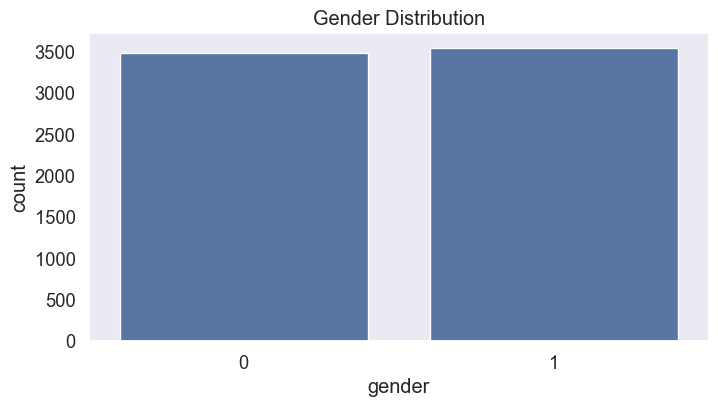

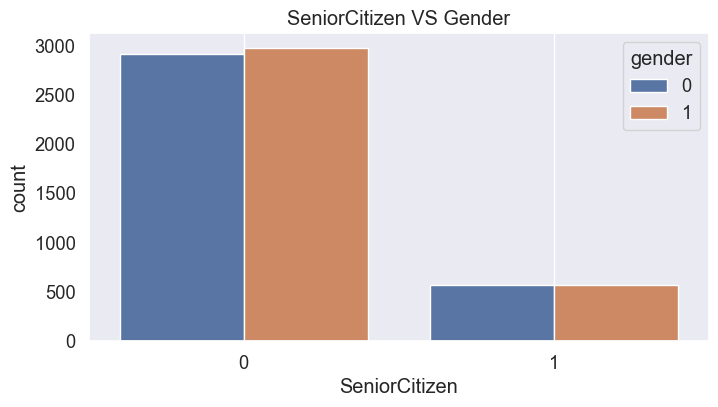

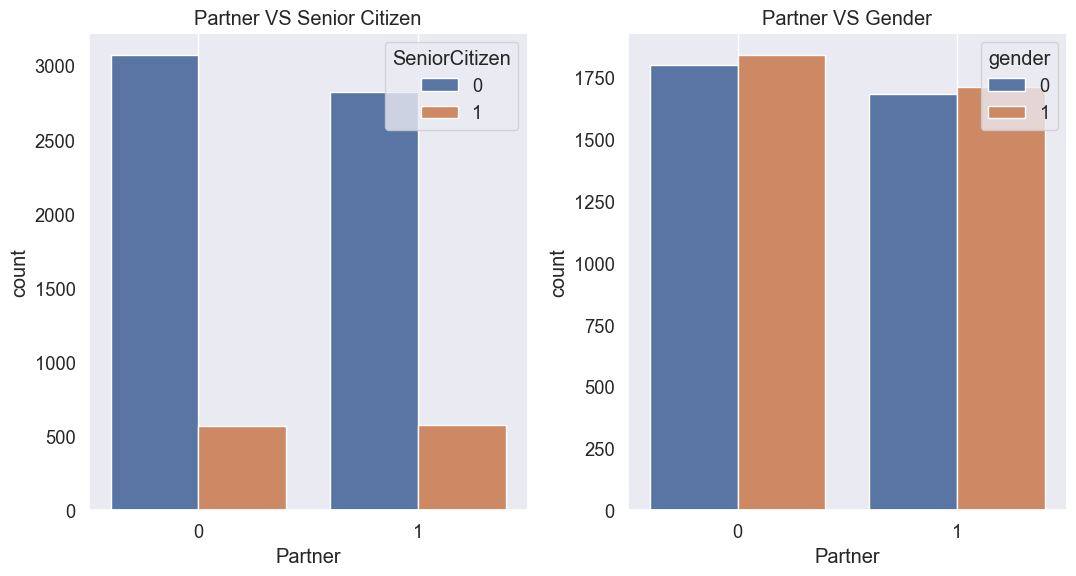

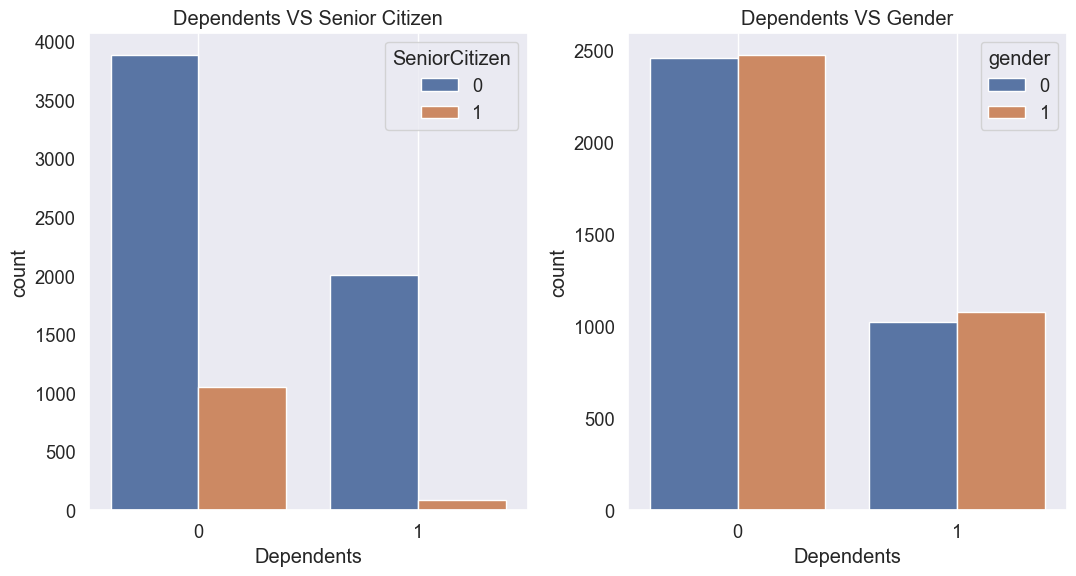

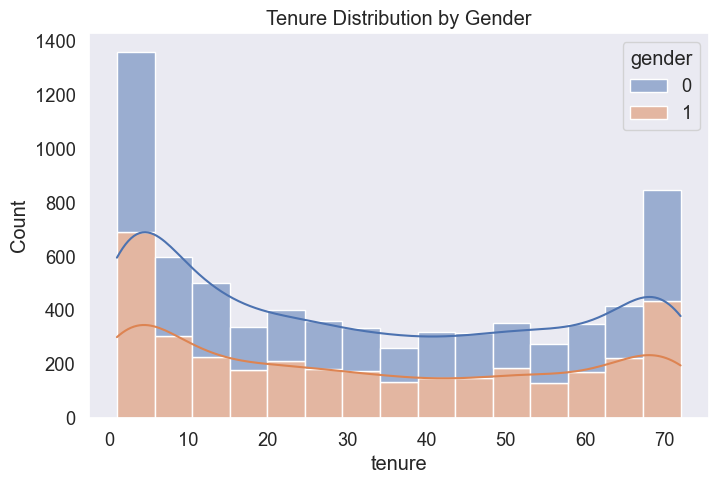

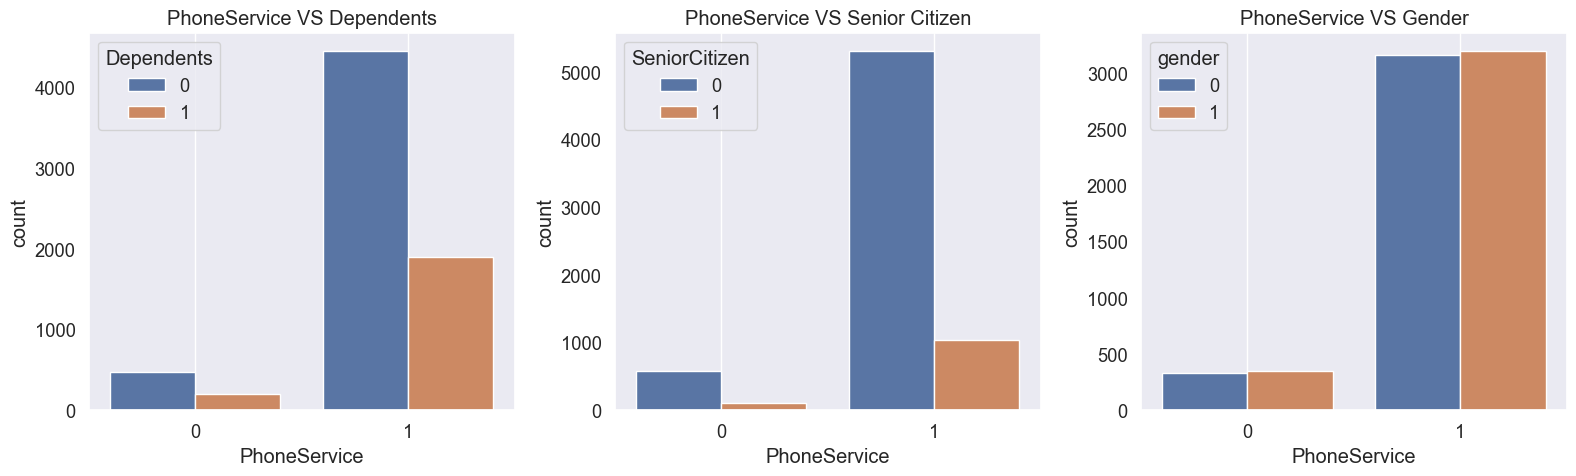

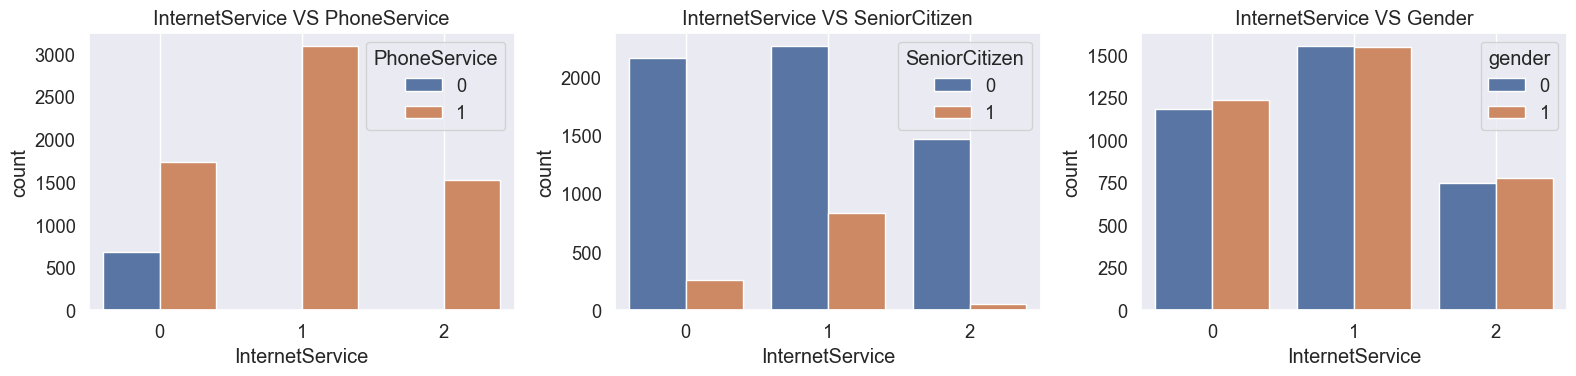

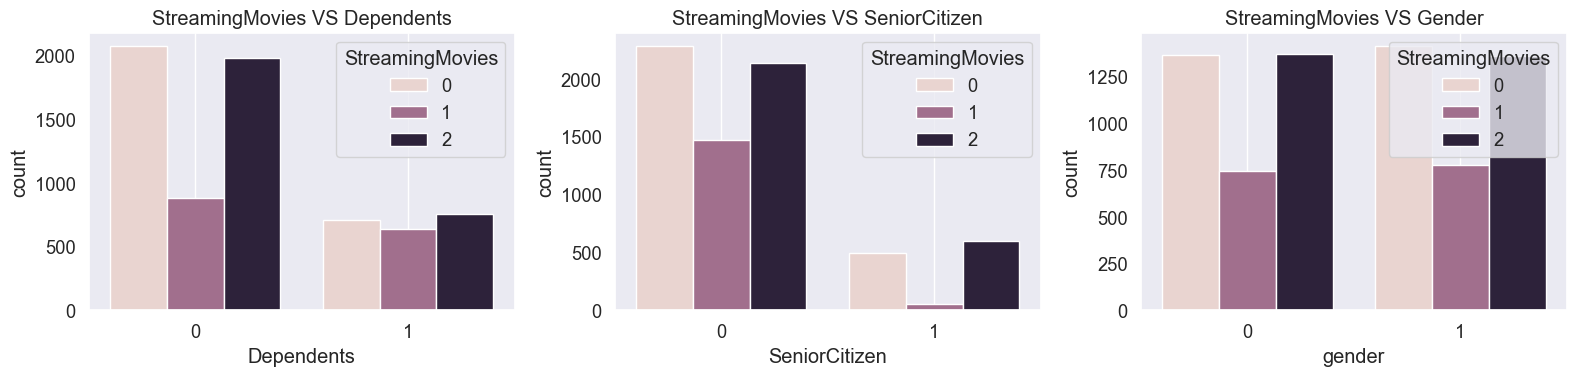

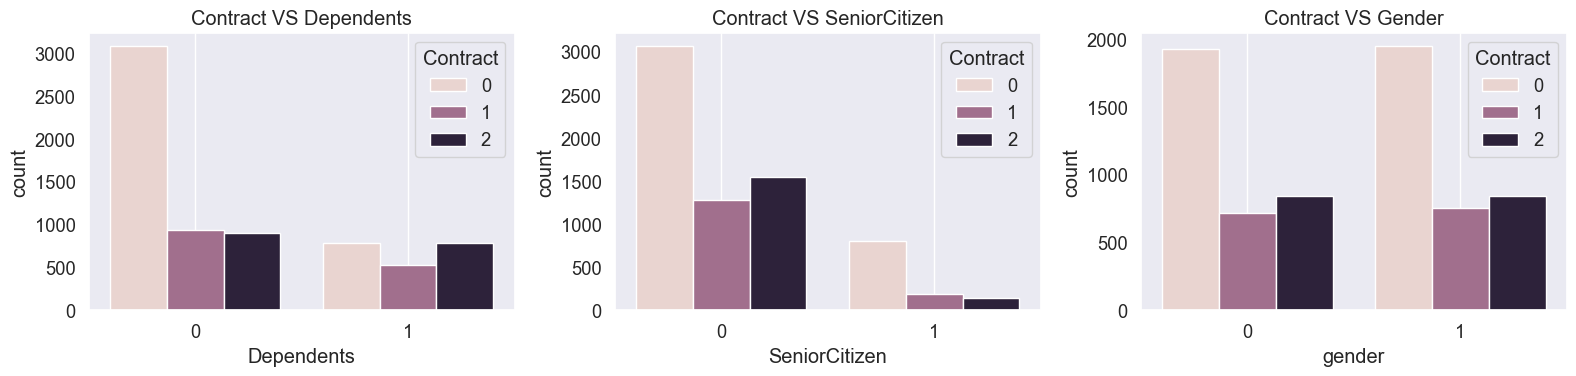

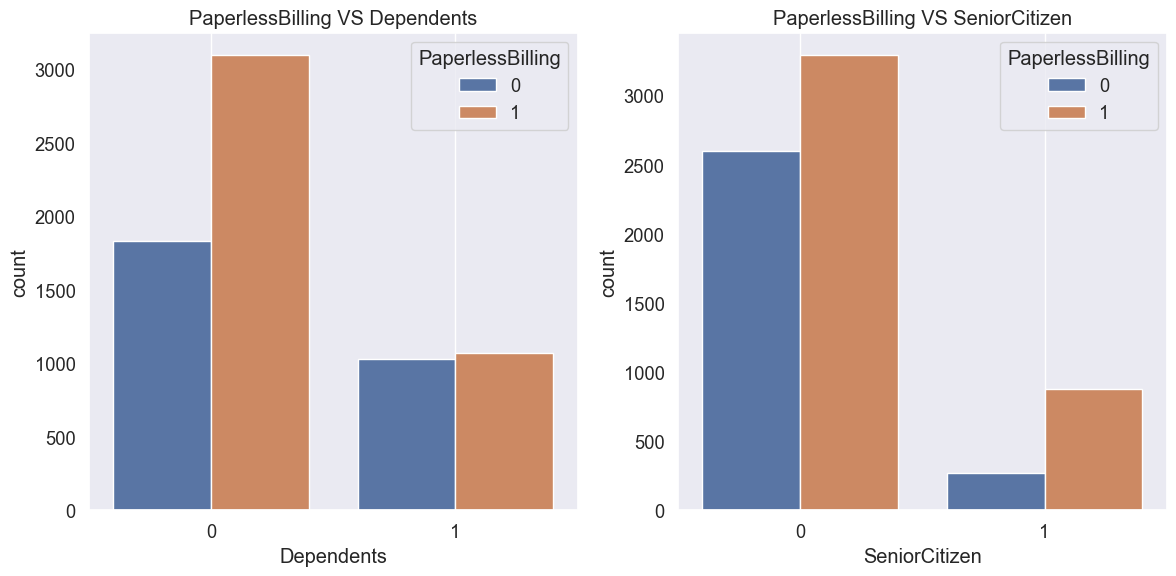

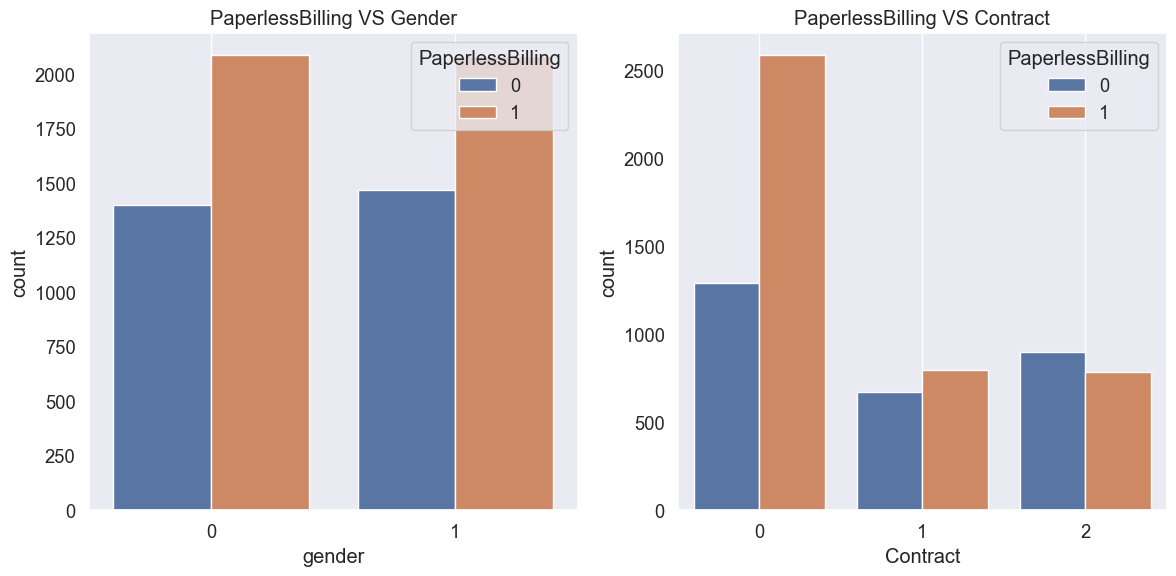

In [2472]:
print("---- Visualizations ----")

# Gender Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='gender')
plt.grid(False)
plt.title("Gender Distribution")
plt.show()

# SeniorCitizen vs Gender
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='gender')
plt.grid()
plt.title("SeniorCitizen VS Gender")
plt.show()

# Partner vs SeniorCitizen and Partner vs Gender
plt.figure(figsize=(11, 6))

# Subplot 1: Partner vs Senior Citizen
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Partner', hue='SeniorCitizen')
plt.grid()
plt.title("Partner VS Senior Citizen")

# Subplot 2: Partner vs Gender
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Partner', hue='gender')
plt.grid()
plt.title("Partner VS Gender")

plt.tight_layout()
plt.show()

# Dependents vs SeniorCitizen and Dependents vs Gender
plt.figure(figsize=(11, 6))

# Subplot 1: Dependents vs Senior Citizen
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Dependents', hue='SeniorCitizen')
plt.grid()
plt.title("Dependents VS Senior Citizen")

# Subplot 2: Dependents vs Gender
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Dependents', hue='gender')
plt.grid()
plt.title("Dependents VS Gender")

plt.tight_layout()
plt.show()

# Tenure Distribution by Gender
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='gender', kde=True, multiple="stack")
plt.title("Tenure Distribution by Gender")
plt.grid()
plt.show()

# PhoneService related plots
plt.figure(figsize=(16, 5))

# Subplot 1: PhoneService vs Dependents
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='PhoneService', hue='Dependents')
plt.grid()
plt.title("PhoneService VS Dependents")

# Subplot 2: PhoneService vs Senior Citizen
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='PhoneService', hue='SeniorCitizen')
plt.grid()
plt.title("PhoneService VS Senior Citizen")

# Subplot 3: PhoneService vs Gender
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='PhoneService', hue='gender')
plt.grid()
plt.title("PhoneService VS Gender")

plt.tight_layout()
plt.show()

# InternetService related plots
plt.figure(figsize=(16, 4))

# Subplot 1: InternetService vs PhoneService
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='InternetService', hue='PhoneService')
plt.grid()
plt.title("InternetService VS PhoneService")

# Subplot 2: InternetService vs SeniorCitizen
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='InternetService', hue='SeniorCitizen')
plt.grid()
plt.title("InternetService VS SeniorCitizen")

# Subplot 3: InternetService vs Gender
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='InternetService', hue='gender')
plt.grid()
plt.title("InternetService VS Gender")

plt.tight_layout()
plt.show()

# StreamingMovies related plots
plt.figure(figsize=(16, 4))

# Subplot 1: StreamingMovies vs Dependents
plt.subplot(1, 3, 1)
sns.countplot(data=df, hue='StreamingMovies', x='Dependents')
plt.grid()
plt.title("StreamingMovies VS Dependents")

# Subplot 2: StreamingMovies vs SeniorCitizen
plt.subplot(1, 3, 2)
sns.countplot(data=df, hue='StreamingMovies', x='SeniorCitizen')
plt.grid()
plt.title("StreamingMovies VS SeniorCitizen")

# Subplot 3: StreamingMovies vs Gender
plt.subplot(1, 3, 3)
sns.countplot(data=df, hue='StreamingMovies', x='gender')
plt.grid()
plt.title("StreamingMovies VS Gender")

plt.tight_layout()
plt.show()

# Contract related plots
plt.figure(figsize=(16, 4))

# Subplot 1: Contract vs Dependents
plt.subplot(1, 3, 1)
sns.countplot(data=df, hue='Contract', x='Dependents')
plt.grid()
plt.title("Contract VS Dependents")

# Subplot 2: Contract vs SeniorCitizen
plt.subplot(1, 3, 2)
sns.countplot(data=df, hue='Contract', x='SeniorCitizen')
plt.grid()
plt.title("Contract VS SeniorCitizen")

# Subplot 3: Contract vs Gender
plt.subplot(1, 3, 3)
sns.countplot(data=df, hue='Contract', x='gender')
plt.grid()
plt.title("Contract VS Gender")

plt.tight_layout()
plt.show()

# PaperlessBilling related plots
plt.figure(figsize=(12, 6))

# Subplot 1: PaperlessBilling vs Dependents
plt.subplot(1, 2, 1)
sns.countplot(data=df, hue='PaperlessBilling', x='Dependents')
plt.grid()
plt.title("PaperlessBilling VS Dependents")

# Subplot 2: PaperlessBilling vs SeniorCitizen
plt.subplot(1, 2, 2)
sns.countplot(data=df, hue='PaperlessBilling', x='SeniorCitizen')
plt.grid()
plt.title("PaperlessBilling VS SeniorCitizen")

plt.tight_layout()
plt.show()

# PaperlessBilling vs Gender and Contract
plt.figure(figsize=(12, 6))

# Subplot 1: PaperlessBilling vs Gender
plt.subplot(1, 2, 1)
sns.countplot(data=df, hue='PaperlessBilling', x='gender')
plt.grid()
plt.title("PaperlessBilling VS Gender")

# Subplot 2: PaperlessBilling vs Contract
plt.subplot(1, 2, 2)
sns.countplot(data=df, hue='PaperlessBilling', x='Contract')
plt.grid()
plt.title("PaperlessBilling VS Contract")

plt.tight_layout()
plt.show()

## Correlation Matrix

### Independent Features Correlation

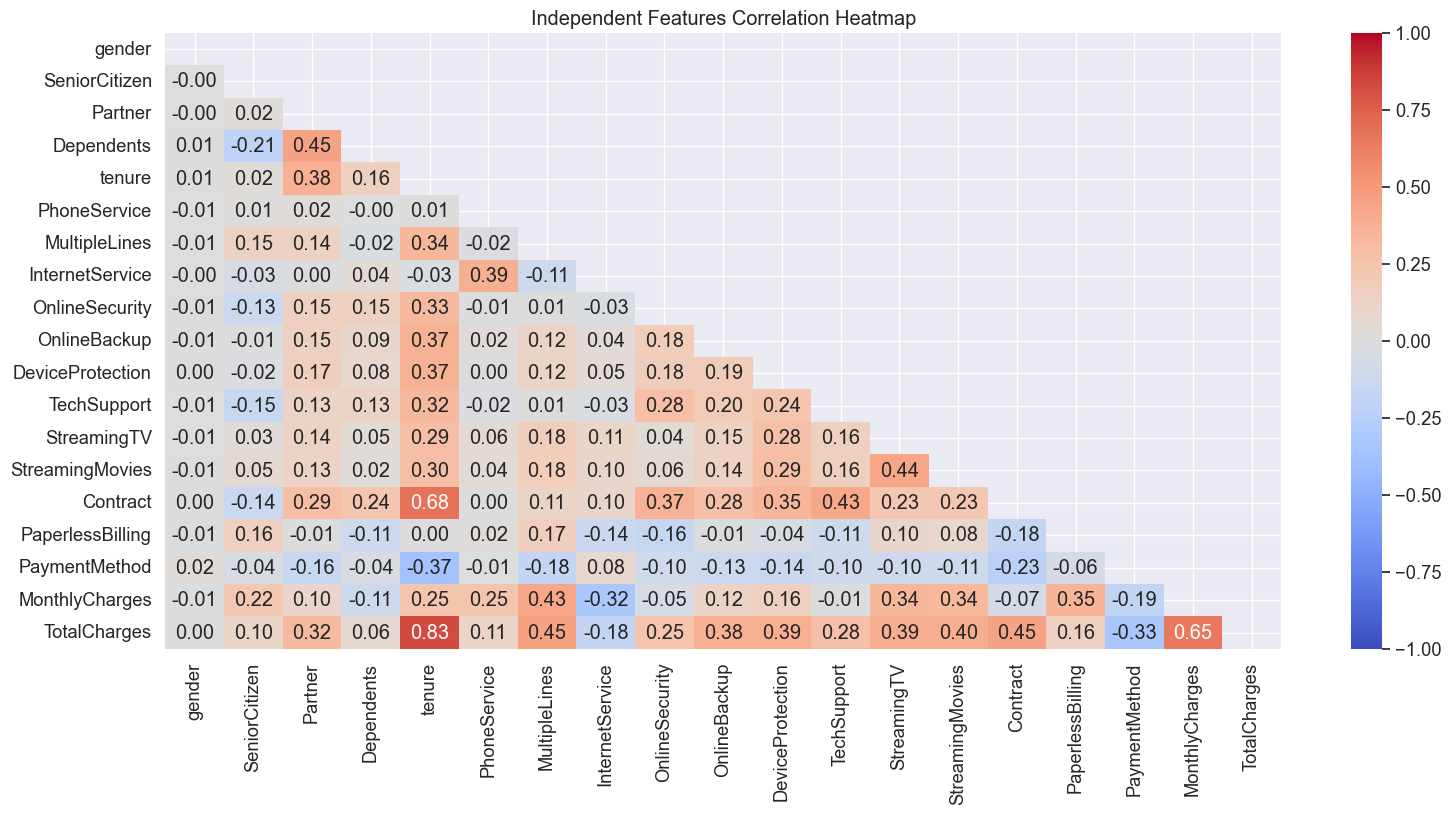

In [2473]:
# Select numerical features and drop the 'Churn' column
independent_features_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = independent_features_df.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the figure size and font scale for better readability
plt.figure(figsize=(18, 8))
sns.set(font_scale=1.2)

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, vmin=-1, vmax=1)

# Set the title and show the plot
plt.title("Independent Features Correlation Heatmap")
plt.show()

### Inpedendent features correlation with prediction labels

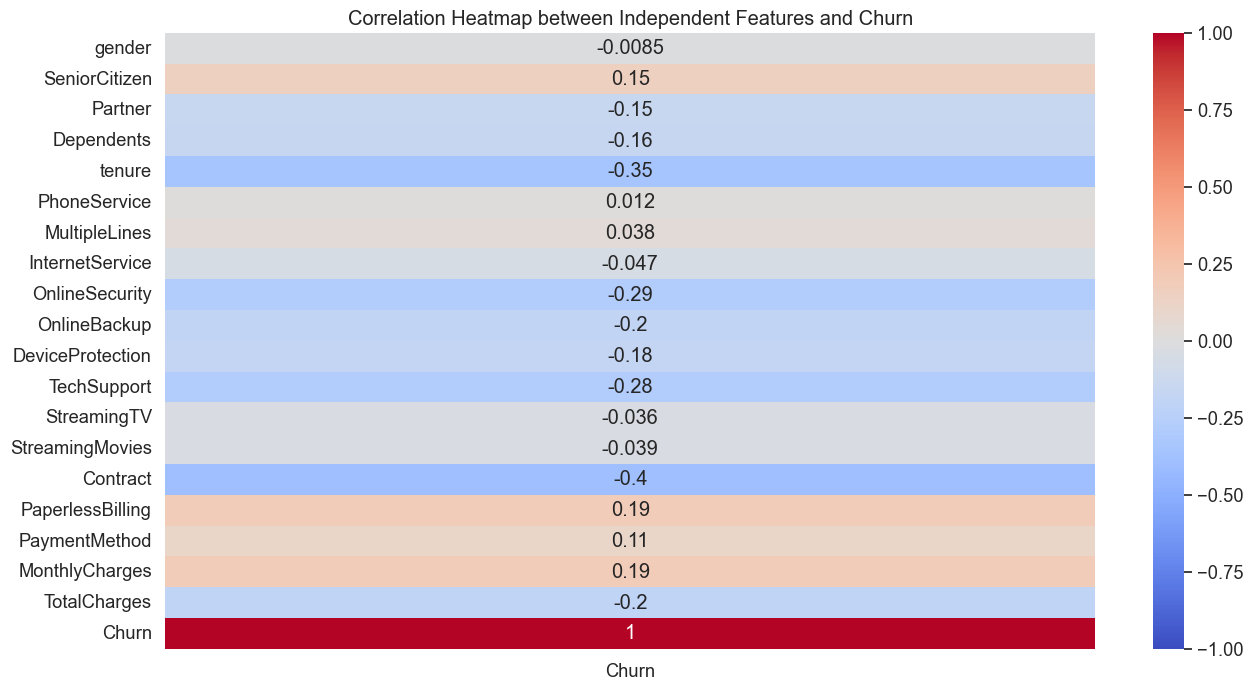

In [2474]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Compute the correlation matrix
correlation_data = df.select_dtypes(include=['number']).corr()['Churn']

# Convert Series to DataFrame for heatmap
correlation_data = correlation_data.to_frame()

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2)
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
# sns.heatmap(churn_correlation.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()

# **Model Building**

In [2475]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    results = [accuracy, precision, recall, f1]

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()
    
    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    print("Confusion Matrix:")
    # print(conf_matrix)
    cm_display.plot()
    plt.grid(False)
    plt.show()
    print()

    return results


In [2476]:
def k_fold_cross_validation_with_metrics(classifier, X, y, k_folds=5):
    
    # Initializing stratified k-fold cross-validation
    stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Lists to store the evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in stratified_kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Append the metrics to their respective lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate and print the mean of each metric across all folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    print("Mean Metrics Across Folds:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Mean Precision: {mean_precision:.2f}")
    print(f"Mean Recall: {mean_recall:.2f}")

    return mean_accuracy, mean_precision, mean_recall

## **K Nearest Neighbour (KNN)**

### **Training the Model**

In [2477]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### **Applying the Model to make a Prediction**

In [2478]:
y_knn_pred = knn.predict(X_test)

In [2479]:
y_knn_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### **Evaluate Model Performance**

Accuracy: 0.76
Precision: 0.55
Recall: 0.54

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1033
           1       0.55      0.54      0.55       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407

Confusion Matrix:


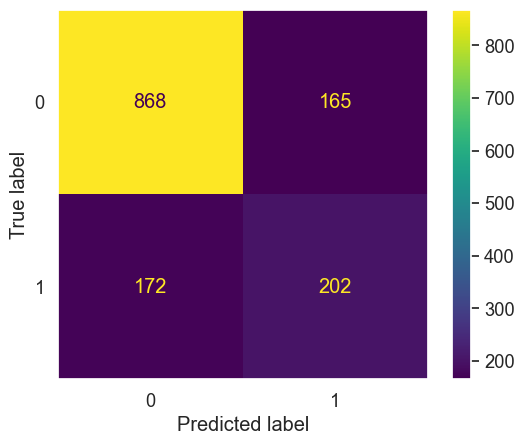

In [2480]:
knn_metrics = print_evaluation_metrics(y_test, y_knn_pred)

In [2481]:
knn_results = pd.DataFrame(['K Nearest Neighbour', knn_metrics[0], knn_metrics[1], knn_metrics[2], knn_metrics[3]]).transpose()
knn_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [2482]:
knn_results

,Method,Accuracy,Precision,Recall,F1 Score
0,K Nearest Neighbour,0.760483,0.550409,0.540107,0.545209


## **Support Vector Machines (SVM)**



### **Training the Model**

In [2483]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

### **Applying the Model to make a Prediction**

In [2484]:
y_svm_pred = svm.predict(X_test)

In [2485]:
y_svm_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### **Evaluate Model Performance**

Accuracy: 0.79
Precision: 0.62
Recall: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix:


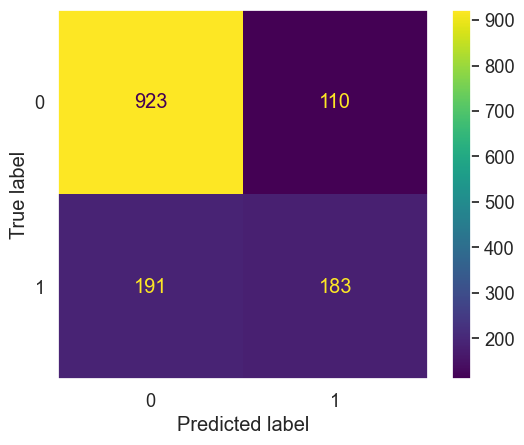

In [2486]:
svm_metrics = print_evaluation_metrics(y_test, y_svm_pred)

In [2487]:
svm_results = pd.DataFrame(['Support Vector Machines', svm_metrics[0], svm_metrics[1], svm_metrics[2], svm_metrics[3]]).transpose()
svm_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [2488]:
svm_results

,Method,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machines,0.78607,0.624573,0.489305,0.548726


## **Logistic Regression**

### **Training the Model**

In [2489]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### **Applying the Model to make a Prediction**

In [2490]:
y_lr_pred = lr.predict(X_test)

In [2491]:
y_lr_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### **Evaluate Model Performance**

Accuracy: 0.79
Precision: 0.62
Recall: 0.56

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Confusion Matrix:


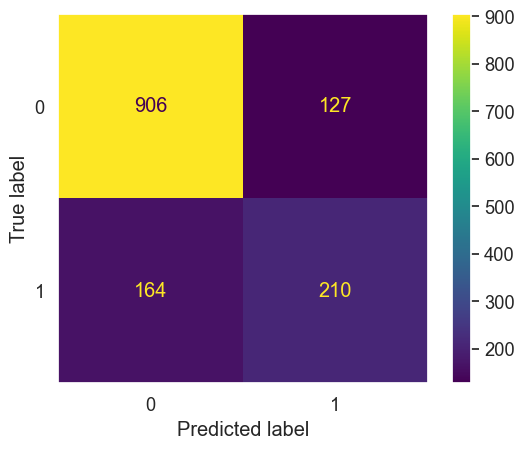

In [2492]:
lr_metrics = print_evaluation_metrics(y_test, y_lr_pred)

In [2493]:
lr_results = pd.DataFrame(['Logistic Regression', lr_metrics[0], lr_metrics[1], lr_metrics[2], lr_metrics[3]]).transpose()
lr_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [2494]:
lr_results

,Method,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.793177,0.623145,0.561497,0.590717


## **Decision Tree**

### **Training the Model**

In [2495]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### **Applying the Model to make a Prediction**

In [2496]:
y_dt_pred = dt.predict(X_test)

In [2497]:
y_dt_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### **Evaluate Model Performance**

Accuracy: 0.73
Precision: 0.49
Recall: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.52      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407

Confusion Matrix:


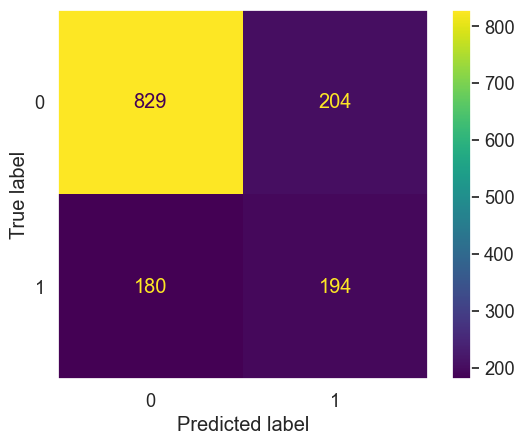

In [2498]:
dt_metrics = print_evaluation_metrics(y_test, y_dt_pred)

In [2499]:
dt_results = pd.DataFrame(['Decision Tree', dt_metrics[0], dt_metrics[1], dt_metrics[2], dt_metrics[3]]).transpose()
dt_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [2500]:
dt_results

,Method,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.727079,0.487437,0.518717,0.502591


## **Random Forest**

### **Training the Model**

In [2501]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### **Applying the Model to make a Prediction**

In [2502]:
y_rf_pred = rf.predict(X_test)

In [2503]:
y_rf_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### **Evaluate Model Performance**

Accuracy: 0.79
Precision: 0.63
Recall: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:


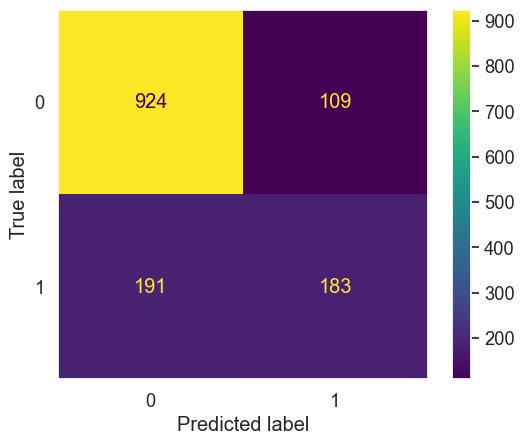

In [2504]:
rf_metrics = print_evaluation_metrics(y_test, y_rf_pred)

In [2505]:
rf_results = pd.DataFrame(['Random Forest', rf_metrics[0], rf_metrics[1], rf_metrics[2], rf_metrics[3]]).transpose()
rf_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [2506]:
rf_results

,Method,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.78678,0.626712,0.489305,0.54955


# **Model Comparison**

In [2507]:
# Result before Cross Validation and Resampling
df_models = pd.concat([knn_results, svm_results, lr_results, dt_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Accuracy,Precision,Recall,F1 Score
0,K Nearest Neighbour,0.760483,0.550409,0.540107,0.545209
1,Support Vector Machines,0.78607,0.624573,0.489305,0.548726
2,Logistic Regression,0.793177,0.623145,0.561497,0.590717
3,Decision Tree,0.727079,0.487437,0.518717,0.502591
4,Random Forest,0.78678,0.626712,0.489305,0.54955


## Resampling data and Cross Validation

In [2508]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Check class distribution before SMOTE
print(f"Before SMOTE: {Counter(y_train)}")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(f"After SMOTE: {Counter(y_train_resampled)}")


Before SMOTE: Counter({0: 4130, 1: 1495})
After SMOTE: Counter({0: 4130, 1: 4130})


In [2515]:
print("Cross Validation Mean Metrics")
print("\nK Nearest Neighbour CV Mean Metrics: ")
knn_cv = k_fold_cross_validation_with_metrics(knn, X_train_resampled, y_train_resampled)
print("\nSupport Vector Machine CV Mean Metrics: ")
svm_cv = k_fold_cross_validation_with_metrics(svm, X_train_resampled, y_train_resampled)
print("\nLogistic Regression CV Mean Metrics: ")
lr_cv = k_fold_cross_validation_with_metrics(lr, X_train_resampled, y_train_resampled)
print("\nDecision Tree CV Mean Metrics: ")
dt_cv = k_fold_cross_validation_with_metrics(dt, X_train_resampled, y_train_resampled)
print("\nRandom Forest CV Mean Metrics: ")
rf_cv = k_fold_cross_validation_with_metrics(rf, X_train_resampled, y_train_resampled)

cv_metrics = {
    'K Nearest Neighbour': knn_cv,
    'Support Vector Machine': svm_cv,
    'Logistic Regression': lr_cv,
    'Decision Tree': dt_cv,
    'Random Forest': rf_cv
}

results_list = []

for name, metrics in cv_metrics.items():
    if metrics is not None and all(metric is not None for metric in metrics):
        accuracy, precision, recall = metrics
        results_list.append({
            'Method': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall
        })
    else:
        print(f"Metrics for {name} are not available.")

results_df = pd.DataFrame(results_list)
results_df

Cross Validation Mean Metrics

K Nearest Neighbour CV Mean Metrics: 
Mean Metrics Across Folds:
Mean Accuracy: 0.80
Mean Precision: 0.75
Mean Recall: 0.89

Support Vector Machine CV Mean Metrics: 
Mean Metrics Across Folds:
Mean Accuracy: 0.80
Mean Precision: 0.78
Mean Recall: 0.84

Logistic Regression CV Mean Metrics: 
Mean Metrics Across Folds:
Mean Accuracy: 0.79
Mean Precision: 0.76
Mean Recall: 0.84

Decision Tree CV Mean Metrics: 
Mean Metrics Across Folds:
Mean Accuracy: 0.77
Mean Precision: 0.76
Mean Recall: 0.78

Random Forest CV Mean Metrics: 
Mean Metrics Across Folds:
Mean Accuracy: 0.84
Mean Precision: 0.82
Mean Recall: 0.86


,Method,Accuracy,Precision,Recall
0,K Nearest Neighbour,0.795884,0.748096,0.892252
1,Support Vector Machine,0.802785,0.782325,0.839225
2,Logistic Regression,0.790436,0.763897,0.840920
3,Decision Tree,0.766586,0.761970,0.775545
4,Random Forest,0.835835,0.820740,0.859564


In [2510]:
models = {"K Nearest Neighbour": (knn, knn_cv[0]), 
"Support Vector Machines": (svm, svm_cv[0]), 
"Logistic Regression": (lr, lr_cv[0]), 
"Decision Tree": (dt, dt_cv[0]), 
"Random Forest": (rf, rf_cv[0])}

Best_acc = 0.0
Best_model = None

for name, (model, acc) in models.items():
    acc = acc*100
    print(f"Accuracy score of {name} is {acc:.2f}%\n")
    
    if acc>Best_acc:
        Best_acc = acc
        Best_model = name
        chosen_model = model
        
# Printing the best parameters and score
print(f"Best Model is {Best_model} with {Best_acc:.2f}% accuracy")


Accuracy score of K Nearest Neighbour is 76.00%

Accuracy score of Support Vector Machines is 79.84%

Accuracy score of Logistic Regression is 79.98%

Accuracy score of Decision Tree is 74.06%

Accuracy score of Random Forest is 83.57%

Best Model is Random Forest with 83.57% accuracy


In [2511]:
with open("customer_churn_model.pkl", 'wb') as model_file:
    pickle.dump(chosen_model, model_file)

# **Deployment of Prediction**

In [2512]:
class CustomerChurnClassifier:
    
    def __init__(self, model_path, encoder_path):
        # Load the model
        with open(model_path, 'rb') as file:
            self.model = pickle.load(file)
        
        # Load the LabelEncoders
        with open(encoder_path, 'rb') as file:
            self.encoders = pickle.load(file)
    
    def predict(self, tenure: int, phone_service: str, multiple_lines: str, internet_service: str, online_security: str, online_backup: str, device_protection: str, tech_support: str, streaming_tv: str, streaming_movies: str, contract: str, paperless_billing: str, payment_method: str, monthly_charges: float, total_charges: float, gender: str, senior_citizen: int, partner: str, dependents: str):
        
        # Checking input datatypes
        expected_data_types = [int, str, str, str, str, str, str, str, str, str, str, str, str, float, float, str, int, str, str]
        input_arguments = [tenure, phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, contract, paperless_billing, payment_method, monthly_charges, total_charges, gender, senior_citizen, partner, dependents]
        input_arguments_names = ['tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents']

        for i in range(len(input_arguments)):
            current_arg_type = type(input_arguments[i])
            if current_arg_type != expected_data_types[i]:
                raise TypeError(f"Error: Given {input_arguments_names[i]} ({current_arg_type.__name__}) is not of the expected type ({expected_data_types[i].__name__}).")
        
        # Transform categorical features using LabelEncoder
        encoded_features = [
            self.encoders['gender'].transform([gender])[0],
            self.encoders['Partner'].transform([partner])[0],
            self.encoders['Dependents'].transform([dependents])[0],
            self.encoders['PhoneService'].transform([phone_service])[0],
            self.encoders['MultipleLines'].transform([multiple_lines])[0],
            self.encoders['InternetService'].transform([internet_service])[0],
            self.encoders['OnlineSecurity'].transform([online_security])[0],
            self.encoders['OnlineBackup'].transform([online_backup])[0],
            self.encoders['DeviceProtection'].transform([device_protection])[0],
            self.encoders['TechSupport'].transform([tech_support])[0],
            self.encoders['StreamingTV'].transform([streaming_tv])[0],
            self.encoders['StreamingMovies'].transform([streaming_movies])[0],
            self.encoders['Contract'].transform([contract])[0],
            self.encoders['PaperlessBilling'].transform([paperless_billing])[0],
            self.encoders['PaymentMethod'].transform([payment_method])[0]
        ]
        
        # Combine numerical and encoded features
        to_predict_array = [senior_citizen, tenure, monthly_charges, total_charges] + encoded_features
        to_predict_array = np.array(to_predict_array).reshape((1, -1))
        
        # Make prediction
        prediction = self.model.predict(to_predict_array)[0]

        if prediction > 0.5:
            return 'Will Churn'
        else:
            return "Won't Churn"

In [2513]:
customer_churn = CustomerChurnClassifier(
    model_path = 'customer_churn_model.pkl', 
    encoder_path = 'encoder.pkl'
)

In [2514]:
customer_churn.predict(
    tenure=18,
    phone_service='No',
    multiple_lines='No phone service',
    internet_service='DSL',
    online_security='No',
    online_backup='No',
    device_protection='Yes',
    tech_support='No',
    streaming_tv='Yes',
    streaming_movies='No',
    contract='Month-to-month',
    paperless_billing='No',
    payment_method='Electronic check',
    monthly_charges=70.50,
    total_charges=1250.00,
    gender='Female',
    senior_citizen=0,
    partner='No',
    dependents='Yes'
)

"Won't Churn"